In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [119]:
# Enable inline plotting
%matplotlib inline

In [120]:
data = pd.read_csv("../data/cars.csv")

data.head()

,Year,Make,Model,Price,Miles,Rating
0,2021,Jeep,Cherokee Latitude Lux FWD,20944,36000,Excellent Price
1,2021,Hyundai,Kona Electric Ultimate,21694,30000,Excellent Price
2,2021,Volkswagen,Tiguan 2.0T SEL 4MOTION,18922,83000,Excellent Price
3,2021,Tesla,Model 3 Standard Range Plus RWD,19972,43000,Excellent Price
4,2021,BMW,X3 xDrive30i AWD,29000,43000,Excellent Price


In [121]:
# Check for missing values
data.isnull().sum()

Year       0
Make       0
Model      0
Price      0
Miles      0
Rating    38
dtype: int64

In [122]:
# Drop rating column for now
data = data.drop("Rating", axis=1)

data["Age"] = 2024 - data["Year"]

In [123]:
assert data.isnull().sum().sum() == 0

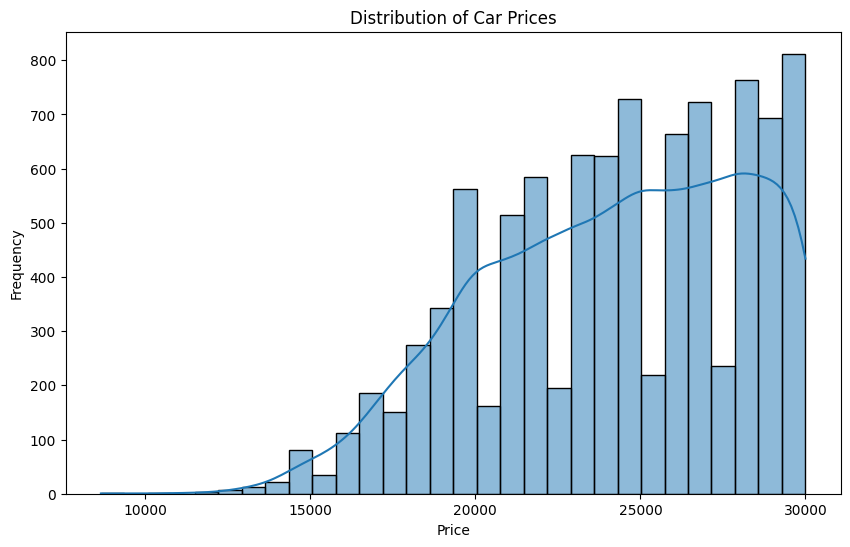

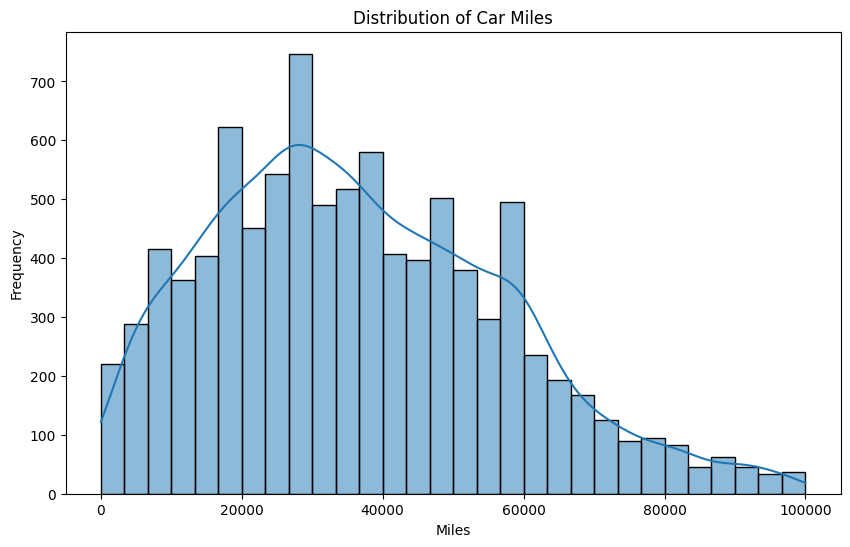

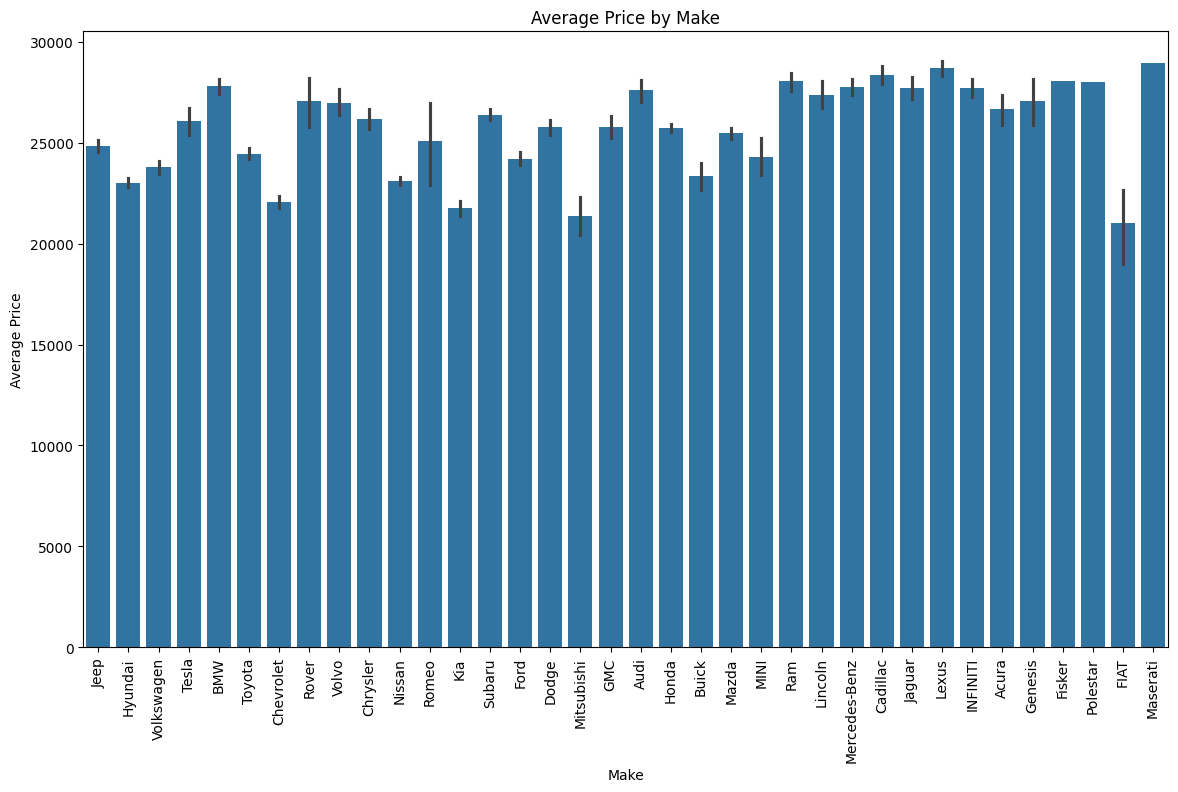

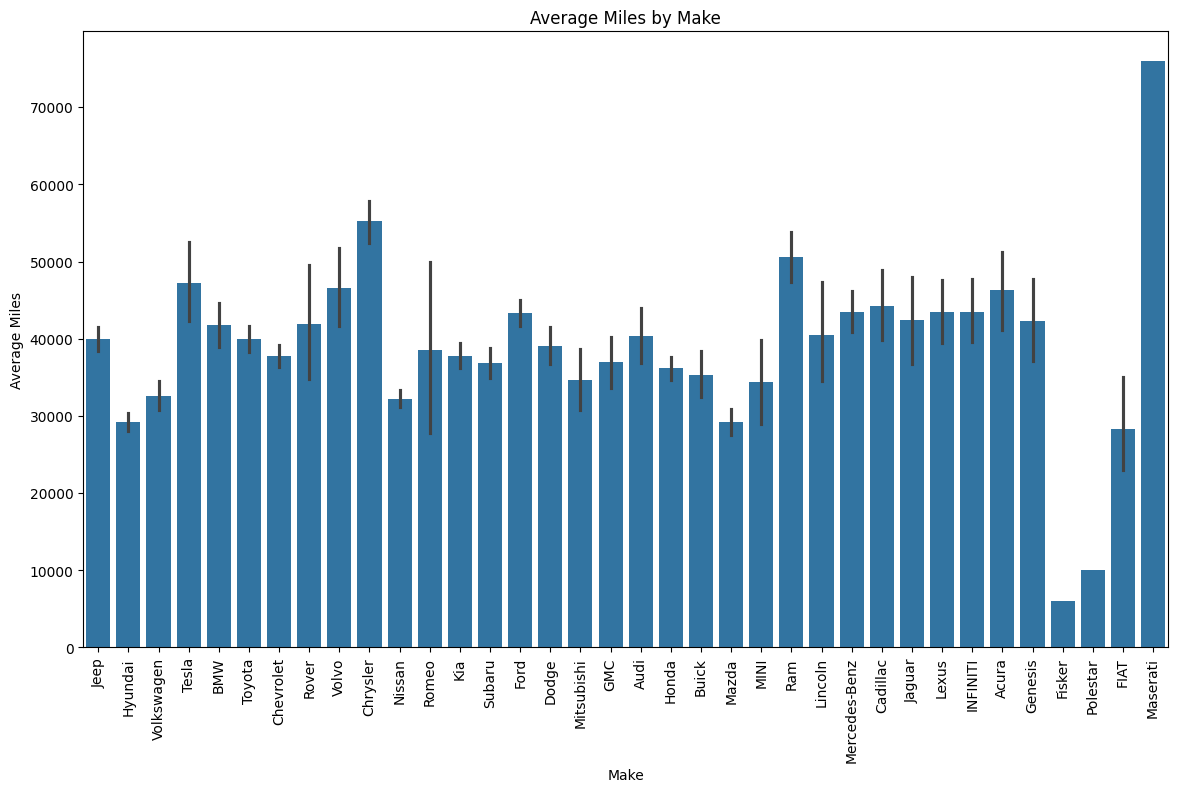

In [124]:
# Basic statistics
data.describe()

# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data["Price"], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Distribution of miles
plt.figure(figsize=(10, 6))
sns.histplot(data["Miles"], bins=30, kde=True)
plt.title("Distribution of Car Miles")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()

# Average price by make
plt.figure(figsize=(14, 8))
sns.barplot(x="Make", y="Price", data=data)
plt.xticks(rotation=90)
plt.title("Average Price by Make")
plt.xlabel("Make")
plt.ylabel("Average Price")
plt.show()

# Average miles by make
plt.figure(figsize=(14, 8))
sns.barplot(x="Make", y="Miles", data=data)
plt.xticks(rotation=90)
plt.title("Average Miles by Make")
plt.xlabel("Make")
plt.ylabel("Average Miles")
plt.show()

In [125]:
# Normalize the features: Price, Miles, and Year
scaler = MinMaxScaler()

# Normalize Price and Miles (invert Price to prioritize lower prices)
data["Norm_Price"] = 1 - scaler.fit_transform(data[["Price"]])
data["Norm_Miles"] = 1 - scaler.fit_transform(data[["Miles"]])
data["Norm_Age"] = 1 - scaler.fit_transform(data[["Age"]])

In [126]:
# Assign weights
price_weight = 0.6
miles_weight = 0.3
year_weight = 0.1

# Calculate the composite score
data["Composite_Score"] = (
    data["Norm_Price"] * price_weight
    + data["Norm_Miles"] * miles_weight
    + data["Norm_Age"] * year_weight
)

In [127]:
# Rank the cars based on the composite score
data["Rank"] = data["Composite_Score"].rank(ascending=False)

# Sort the data by rank
data = data.sort_values(by="Rank")

# Display the ranked data
display(data)

,Year,Make,Model,Price,Miles,Age,Norm_Price,Norm_Miles,Norm_Age,Composite_Score,Rank
2806,2024,Mitsubishi,Mirage LE Hatchback,15600,13000,0,0.674631,0.870044,1.00,0.765792,1.0
5306,2024,Kia,Forte LXS IVT,17700,8000,0,0.576247,0.920046,1.00,0.721762,2.0
9060,2022,Mitsubishi,Mirage ES CVT,16995,4000,2,0.609276,0.960048,0.50,0.703580,3.0
5376,2023,Kia,Rio S Sedan IVT,17512,9000,1,0.585055,0.910046,0.75,0.699047,4.0
7125,2024,Mitsubishi,Mirage G4 LE Sedan,18998,4000,0,0.515437,0.960048,1.00,0.697277,5.0
...,...,...,...,...,...,...,...,...,...,...,...
5680,2020,Ram,"1500 Big Horn Crew Cab 5'7"" Box 4WD",30000,90000,4,0.000000,0.100005,0.00,0.030002,9329.0
3848,2020,Chevrolet,Tahoe LT 4WD,28989,100000,4,0.047365,0.000000,0.00,0.028419,9330.0
4104,2020,Jeep,Wrangler Unlimited Rubicon,29998,93000,4,0.000094,0.070004,0.00,0.021057,9331.0
5173,2020,Chevrolet,Suburban LT RWD,29996,95000,4,0.000187,0.050003,0.00,0.015113,9332.0


In [128]:
# Save the ranked data to a new CSV file
data.to_csv("../data/ranked_cars.csv", index=False)